<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/number_of_clusters_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Code adapted from](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

In [ ]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import silhouette_score

[Wholesale customers data](https://archive.ics.uci.edu/dataset/292/wholesale+customers)

In [ ]:
data_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/Wholesale_customers_data.csv'

In [ ]:
data = pd.read_csv(data_url)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.Region.unique()

array([3, 1, 2])

# Feature encoding and scaling

In [ ]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [ ]:
data[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# one-hot-encoding
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [ ]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [ ]:
data_transformed[0]

array([0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
       0.02784731, 0.        , 1.        , 0.        , 0.        ,
       1.        ])

In [ ]:
data_transformed.shape

(440, 11)

# Tracking metrics:

**inertia_** :Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

In [39]:
sum_of_squared_distances = []
silhouette_scores = []

K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)

    labels = km.labels_
    silhouette_avg = silhouette_score(data_transformed, labels)

    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_avg)

In [ ]:
km.inertia_

7.715914273289647

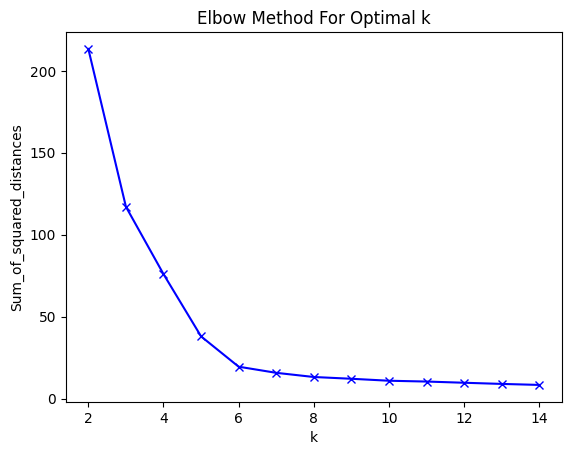

In [40]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

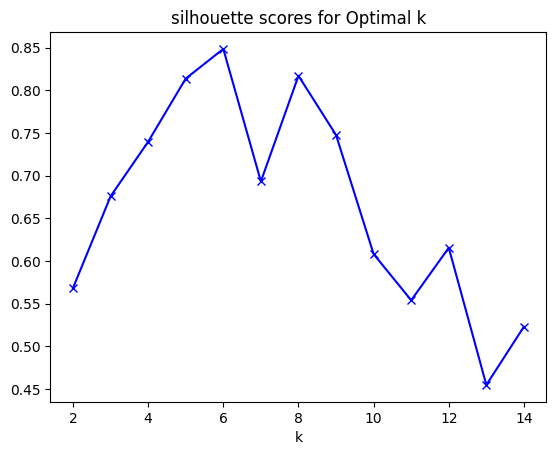

In [ ]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('')
plt.title('silhouette scores for Optimal k')
plt.show()